### Importing Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

from IPython.display import display
pd.options.display.max_columns = None

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
data = pd.read_csv('pubg_kills.csv')

In [3]:
data.head()

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-12-27T20:20:31+0000,48,2U4GBNA0YmnMHZeAz4CH3TqfbVXa9KYNPgEsoXjtphE4Qm...,tpp,2,0,1,0.000000,77.369510,100,0,yinghechiji777,149.366,22,42
1,2018-01-01T06:08:26+0000,28,2U4GBNA0YmlRlJBlopOrzVTB5S2u-ryn86WvqBvX8-ar96...,tpp,4,0,0,0.000000,0.000000,0,0,HuYaTVzilong666,175.910,17,5
2,2017-12-17T23:05:22+0000,87,2U4GBNA0Ymkqn6Q_r0NzT3a0pdgnH_c9ui5qf72lez_Aub...,tpp,1,0,0,734.290833,3628.126460,20,0,doushicaiMN,1460.299,100008,20
3,2017-12-02T02:01:36+0000,28,2U4GBNA0YmmJVgN8OlKtSFSQgMmeGZyB-GCoTyVEcZugTn...,tpp,4,0,4,0.000000,826.791748,515,4,saonima7,617.122,25,20
4,2017-11-26T02:00:42+0000,25,2U4GBNA0YmkYaAOl9jNhkeTFPTcf0EtSbU6BEFJZj320Pi...,tpp,4,0,0,2756.481000,313.395700,0,0,darrenrtee,322.922,16,21


In [4]:
print(data.shape)

(100000, 15)


In [5]:
print(data.columns)

Index(['date', 'game_size', 'match_id', 'match_mode', 'party_size',
       'player_assists', 'player_dbno', 'player_dist_ride', 'player_dist_walk',
       'player_dmg', 'player_kills', 'player_name', 'player_survive_time',
       'team_id', 'team_placement'],
      dtype='object')


#### Length of the dataset

In [6]:
len(data)

100000

## Understanding Pandas DataFrame

In [7]:
#To access a column
data.player_survive_time.head()

0     149.366
1     175.910
2    1460.299
3     617.122
4     322.922
Name: player_survive_time, dtype: float64

In [8]:
#To access multiple columns
data[['party_size','player_kills']].head(4)

,party_size,player_kills
0,2,0
1,4,0
2,1,0
3,4,4


In [9]:
#To access a multiple rows
data.iloc[3:6]

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
3,2017-12-02T02:01:36+0000,28,2U4GBNA0YmmJVgN8OlKtSFSQgMmeGZyB-GCoTyVEcZugTn...,tpp,4,0,4,0.000,826.791748,515,4,saonima7,617.122,25,20
4,2017-11-26T02:00:42+0000,25,2U4GBNA0YmkYaAOl9jNhkeTFPTcf0EtSbU6BEFJZj320Pi...,tpp,4,0,0,2756.481,313.395700,0,0,darrenrtee,322.922,16,21
5,2017-12-16T22:45:07+0000,28,2U4GBNA0YmlnhtZaMwQ3tlF6SbPnNR7iMWGMISEqMFGeFi...,tpp,4,0,0,0.000,349.153900,66,0,Fearangel123,378.599,15,19


## Dealing with the 'date' feature

In [10]:
data['date'] =  pd.to_datetime(data['date'], format='%Y-%m-%dT%H:%M:%S+0000')

In [11]:
data['Day'] = pd.DatetimeIndex(data['date']).weekday
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [12]:
data['Hour'] = pd.DatetimeIndex(data['date']).hour

In [13]:
data.head(3)

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement,Day,Hour
0,2017-12-27 20:20:31,48,2U4GBNA0YmnMHZeAz4CH3TqfbVXa9KYNPgEsoXjtphE4Qm...,tpp,2,0,1,0.000000,77.36951,100,0,yinghechiji777,149.366,22,42,2,20
1,2018-01-01 06:08:26,28,2U4GBNA0YmlRlJBlopOrzVTB5S2u-ryn86WvqBvX8-ar96...,tpp,4,0,0,0.000000,0.00000,0,0,HuYaTVzilong666,175.910,17,5,0,6
2,2017-12-17 23:05:22,87,2U4GBNA0Ymkqn6Q_r0NzT3a0pdgnH_c9ui5qf72lez_Aub...,tpp,1,0,0,734.290833,3628.12646,20,0,doushicaiMN,1460.299,100008,20,6,23


### Getting Rid of Redundant Variables

In [14]:
del data['date']  # As we have already extracted the useful info i.e. Weekday and Hour
del data['match_mode']  # Because all the matches were played in TPP (Third-Person Perspective) mode
del data['team_id']  # Because we already have match_id and player_name to uniquely identify an instance

## Steps
*  Problem Identification 
*  Hypothesis Generation
*  Variable Identification
*  Univariate Analysis
*  Bivariate Analysis
*  Missing Values
*  Outliers
*  Feature Engineering/Variable Transformation
*  Predictive Modeling
*  Analysing the Model
*  Final Model Selection

## Variable Identification & their datatypes
Identify the predictor and target variables & their data types along with the category of variables

In [15]:
data.dtypes

game_size                int64
match_id                object
party_size               int64
player_assists           int64
player_dbno              int64
player_dist_ride       float64
player_dist_walk       float64
player_dmg               int64
player_kills             int64
player_name             object
player_survive_time    float64
team_placement           int64
Day                      int64
Hour                     int64
dtype: object

Normally, numeric columns in python are represented as "int32", "float32", "int64", "float64". Whereas character columns are represented as "object"

## Univariate Analysis
Analysing the variables one at a time. Let's analyse coninuous and categorical variables separately.

### For Continuous Variables : We generally measure the central tendency of the variable such as Mean , Median , Mode , Std, variance ,etc.
* Basic Statistics
* Plotting Histogram
* Plotting Boxplot

In [16]:
data.describe()

,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_placement,Day,Hour
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,47.270370,2.731850,0.228080,0.585070,1151.386508,1298.287998,124.314390,0.890040,6.372631e+05,24.603160,3.128460,10.184140
std,25.312755,1.248952,0.572698,1.120186,1966.536482,5231.317844,170.412194,1.571233,2.012723e+08,20.505446,2.052345,6.994827
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,27.000000,2.000000,0.000000,0.000000,0.000000,209.363356,0.000000,0.000000,2.459485e+02,10.000000,1.000000,4.000000
50%,43.000000,2.000000,0.000000,0.000000,0.000000,841.050751,77.000000,0.000000,6.498910e+02,20.000000,3.000000,9.000000
75%,50.000000,4.000000,0.000000,1.000000,1887.781010,2052.841122,174.000000,1.000000,1.296196e+03,33.000000,5.000000,16.000000
max,100.000000,4.000000,9.000000,24.000000,175249.100000,752862.250000,4472.000000,45.000000,6.364788e+10,100.000000,6.000000,23.000000


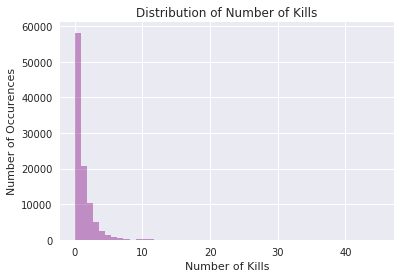

In [17]:
#Plotting histogram for 'player_kills' variable
sns.distplot(data['player_kills'], color="purple", kde=False)
plt.title("Distribution of Number of Kills")
plt.ylabel("Number of Occurences")
plt.xlabel("Number of Kills");

In [18]:
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
dict(data.Day.value_counts())

{5: 16443, 6: 16290, 4: 14458, 0: 14155, 1: 13860, 2: 13183, 3: 11611}

Text(0.5,0.98,'Categorical Plotting')

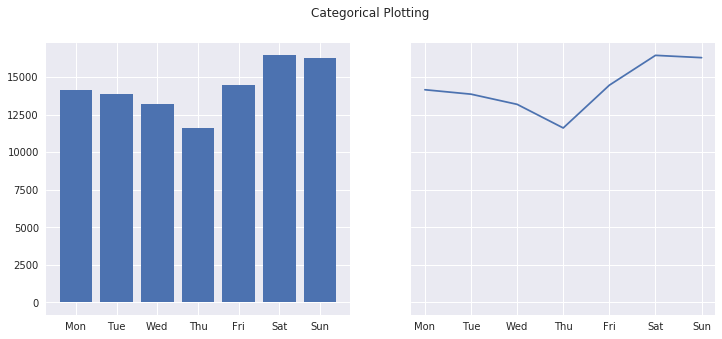

In [19]:
#Plotting histogram for 'Day' variable
week_data = {'Mon': 14155, 'Tue': 13860, 'Wed': 13183, 'Thu': 11611, 'Fri': 14458, 'Sat': 16443, 'Sun': 16290}
names = list(week_data.keys())
values = list(week_data.values())

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axs[0].bar(names, values)
axs[1].plot(names, values)
fig.suptitle('Categorical Plotting')

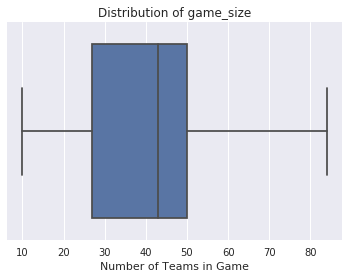

In [20]:
sns.boxplot("game_size", data=data, showfliers=False)
plt.title("Distribution of game_size")
plt.xlabel("Number of Teams in Game");

### For categorical variables: We generally measure the frequency of categories appearing in a particular categorical variable
* Count/Frequency Table
* Plotting Stacked Bar Graph

In [21]:
categorical_variables = ['party_size', 'Day', 'Hour']

In [22]:
categorical_variables

['party_size', 'Day', 'Hour']

In [23]:
data[categorical_variables].apply(lambda x: len(x.unique()))

party_size     3
Day            7
Hour          24
dtype: int64

In [24]:
for var in categorical_variables:
    print(var)
    print(data[var].value_counts())
    print('\n')

party_size
4    47122
2    31819
1    21059
Name: party_size, dtype: int64


Day
5    16443
6    16290
4    14458
0    14155
1    13860
2    13183
3    11611
Name: Day, dtype: int64


Hour
4     6579
5     6321
6     6010
3     6006
2     5394
7     5240
1     4975
8     4538
0     4139
23    3856
9     3745
22    3712
21    3614
19    3404
20    3401
13    3390
14    3373
12    3353
11    3267
10    3234
15    3213
17    3087
18    3079
16    3070
Name: Hour, dtype: int64




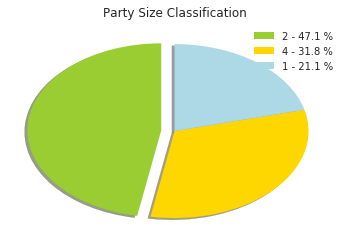

In [25]:
labels = data['party_size'].unique()
sizes = data['party_size'].value_counts().values
explode=[0.1,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Party Size Classification")
plt.show()

## Bivariate Analysis
Bivariate analysis is used to find out the relationship between any 2 variables. It can be done for any combination of variables. The combinations are: 
* Continuous & Continuous
* Categorical & Continuous
* Categorical & Categorical

### Continuous & Continuous
Scatter Plots are used

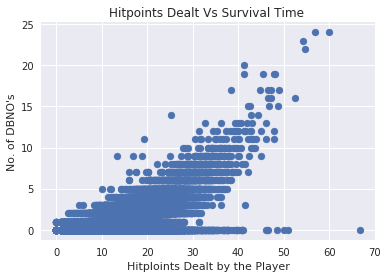

In [26]:
plt.scatter(np.sqrt(data["player_dmg"]), data["player_dbno"])
plt.title("Hitpoints Dealt Vs Survival Time ")
plt.ylabel("No. of DBNO's")
plt.xlabel("Hitploints Dealt by the Player");

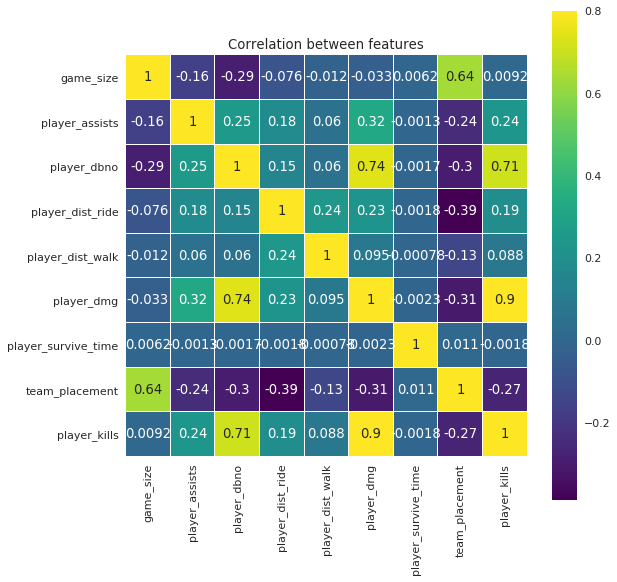

In [27]:
corrMatrix = data[["game_size", "player_assists", "player_dbno",
                   "player_dist_ride", "player_dist_walk", "player_dmg",
                   "player_survive_time", "team_placement", "player_kills"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(9, 9))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

+1 : perfect postive correlation ; -1 : perfect negative correlation ; 0 : No correlation

### Categorical & Continuous
Boxlots can be used

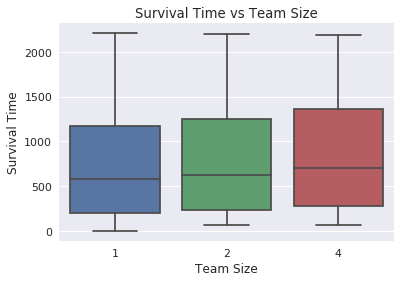

In [28]:
sns.boxplot(data["party_size"], data["player_survive_time"], showfliers=False)
plt.title("Survival Time vs Team Size")
plt.ylabel("Survival Time")
plt.xlabel("Team Size");

### Categorical and categorical
Crosstable and stacked bar plots are used

In [29]:
crosstable = pd.crosstab(data.Day, data.party_size)

In [30]:
crosstable

party_size,1,2,4
Day,,,
0,3000,4551,6604
1,2887,4363,6610
2,2734,4179,6270
3,2534,3761,5316
4,3098,4558,6802
5,3406,5153,7884
6,3400,5254,7636


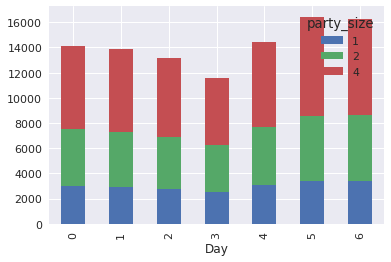

In [31]:
# Plotting stacked bar plot
crosstable.plot(kind='bar',stacked='True')

## Missing Values

In [32]:
# Detecting missing values
data.isnull().sum()

game_size                0
match_id                 0
party_size               0
player_assists           0
player_dbno              0
player_dist_ride         0
player_dist_walk         0
player_dmg               0
player_kills             0
player_name            127
player_survive_time      0
team_placement           0
Day                      0
Hour                     0
dtype: int64

In [33]:
'''
Treating missing values:
1) For continuous variables impute with mean
2) For categorical variables impute with mode
3) For better results predict missing values in a variable by considering it target variable
4) If missing values are less then we can delete the observations having missing values
'''

'\nTreating missing values:\n1) For continuous variables impute with mean\n2) For categorical variables impute with mode\n3) For better results predict missing values in a variable by considering it target variable\n4) If missing values are less then we can delete the observations having missing values\n'

## Outliers
Outliers are the data points showing out of the box behaviour or that appears far away from the overall trend.

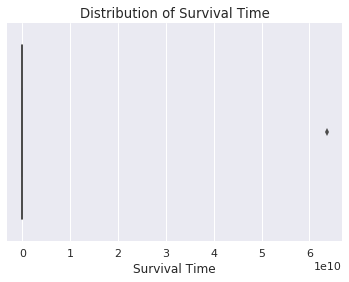

In [34]:
sns.boxplot("player_survive_time", data=data, showfliers=True)
plt.title("Distribution of Survival Time")
plt.xlabel("Survival Time");

In [35]:
#Treating outliers
Q1 = data['player_survive_time'].quantile(.25)
Q3 = data['player_survive_time'].quantile(.75)
IQR = Q3-Q1
lower_value = IQR-1.5*Q1
upper_value = IQR+1.5*Q3

In [36]:
lower_value

681.3247500000002

In [37]:
upper_value

2994.5415000000003

In [38]:
def outlier_imputer(x):
    if x < lower_value or x > upper_value:
        return data['player_survive_time'].median()
    else:
        return x

In [39]:
result = data['player_survive_time'].apply(outlier_imputer)  # This would take a lil bit time to run

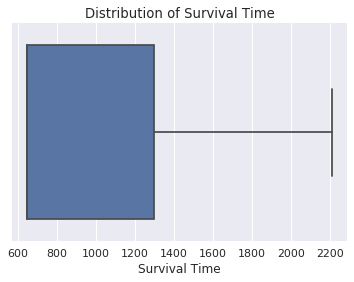

In [40]:
sns.boxplot(result, showfliers=True)
plt.title("Distribution of Survival Time")
plt.xlabel("Survival Time");

# Building the First Model

In [41]:
dependent_variable = 'player_kills'
independent_variable = ['game_size', 'party_size', 'player_assists', 'player_dbno', 'player_dist_ride', 'Hour', 
                        'player_dist_walk', 'player_dmg', 'player_survive_time', 'team_placement', 'Day']

In [42]:
independent_variable

['game_size',
 'party_size',
 'player_assists',
 'player_dbno',
 'player_dist_ride',
 'Hour',
 'player_dist_walk',
 'player_dmg',
 'player_survive_time',
 'team_placement',
 'Day']

###  Splitting our data into training and testing data

In [43]:
from sklearn.model_selection import train_test_split

In [46]:
train, test = train_test_split(data, test_size=.2, shuffle=True, random_state=42)

In [47]:
train.head()

,game_size,match_id,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_placement,Day,Hour
75220,49,2U4GBNA0Ymlpxu4142IX3o0VZzQJWxV3uvCfgaoSSneSzi...,2,0,0,0.00000,104.313683,27,0,ProJabroni,126.936,47,2,15
48955,29,2U4GBNA0YmnHdEuuRhswbvvkIramvPuegAPii0sWtbS7ef...,4,0,0,1787.98840,769.627869,189,1,EcG_MrSnuggles,652.704,21,3,23
44966,28,2U4GBNA0YmljSPqKKHfcfoipkh7cRiO-uXfP-7I7AsWHUn...,4,0,0,0.00000,169.176331,0,0,MagPulFan,189.189,27,0,0
13568,27,2U4GBNA0YmlvqxL52PpOgbtSVoRkJgDg0u6786OfZzHc-0...,4,0,0,1516.74451,6631.514000,0,0,Just_get,1299.602,11,2,16
92727,28,2U4GBNA0YmmKewrBQtciTg85moN2kc-AM5UO3sPZlPbu8w...,4,0,2,0.00000,1492.816410,247,2,yujianQAQ,750.309,19,5,7


In [48]:
print(len(data))
print(len(train))
print(len(test))

100000
80000
20000


In [49]:
# Predicting by using mode
np.round(train['player_kills'].mean())  # train['player_kills'].mean() = 0.887

1.0

In [50]:
test['prediction'] = 1.0

In [51]:
test.head()

,game_size,match_id,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_placement,Day,Hour,prediction
75721,27,2U4GBNA0YmnMybYTCwjE1_5gglbsrLk3_EQp1HlPHuH-5U...,4,0,0,0.00000,0.000000,0,0,YatmmfeNew,820.759,27,5,6,1.0
80184,92,2U4GBNA0Ymnuboe_B7WORcBZ0A10K9rR8q_bQfsfsSQ_WG...,1,0,0,1919.02515,1846.359380,104,1,FFC123,1009.946,30,2,21,1.0
19864,27,2U4GBNA0Ymk6eYbg9BVxAf-FtxgkQWQMwekaAJQwkbKbRj...,4,0,0,0.00000,704.500200,0,0,yangxin6666,392.734,20,5,10,1.0
76699,94,2U4GBNA0YmkHCVuElMLcGhuCNQ0D5ygbfK5dPViRUZ2WM-...,1,0,0,0.00000,138.920624,0,0,HHH-Fiona,131.468,84,0,14,1.0
92991,40,2U4GBNA0Ymkx9m29nap1h44b4geiasv7aNaBGAqbc62-t8...,2,0,1,0.00000,363.146851,182,2,Super-Zach,337.183,30,0,0,1.0


In [52]:
# Analysing the prediction
from sklearn.metrics import mean_squared_error

In [53]:
RMSE = np.sqrt(mean_squared_error(test['prediction'], test[dependent_variable]))
np.round(RMSE)  # RMSE = 1.616

2.0

# Building Machine Learning Model

### Using Linear Regression Algorithm

In [54]:
# Importing machine learning library
from sklearn.linear_model import LinearRegression

In [55]:
# Creating machine learning model
model1 = LinearRegression()

In [56]:
# Training our model
model1.fit(train[independent_variable], train[dependent_variable])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
# Get coeffecients
model1.coef_

array([ 7.06183893e-03, -6.80423888e-03, -1.44394962e-01,  2.05585048e-01,
       -1.90034724e-05,  1.69474867e-04,  1.35505908e-06,  7.31822822e-03,
        2.49836532e-12, -6.15840460e-03, -1.78506620e-04])

In [58]:
# Get intercept
model1.intercept_

-0.2519354750867352

In [59]:
# Predicting on test data
prediction = model1.predict(test[independent_variable])

#### Analysing our model

In [60]:
# Accuracy on training dataset
np.sqrt(mean_squared_error(model1.predict(train[independent_variable]), train[dependent_variable]))

0.6572204395856485

In [61]:
# Accuracy on testing dataset
np.sqrt(mean_squared_error(model1.predict(test[independent_variable]), test[dependent_variable]))

0.6658892848998159

### Using Decision Tree Algorithm

In [62]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor

In [63]:
model2 = DecisionTreeRegressor()

In [64]:
# Training our model
model2.fit(train[independent_variable], train[dependent_variable])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [65]:
# Get Predictions
prediction = model2.predict(test[independent_variable])

In [66]:
# Accuracy on testing dataset
np.sqrt(mean_squared_error(prediction, test[dependent_variable]))

0.8762990357178307

### Using LightGBM

In [67]:
# !pip install lightgbm

In [68]:
# Importing LightGBM Regressor
import lightgbm
from lightgbm import LGBMRegressor

In [69]:
model3 = LGBMRegressor()

In [70]:
# Training our model
model3.fit(train[independent_variable], train[dependent_variable])

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

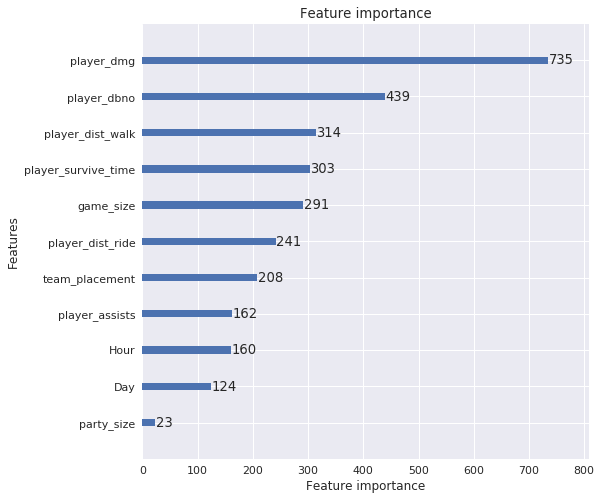

In [71]:
ax = lightgbm.plot_importance(model3)
fig = ax.figure
fig.set_size_inches(8, 8)

In [72]:
# Get Predictions
prediction = model3.predict(test[independent_variable])

In [73]:
# Accuracy on testing dataset
np.sqrt(mean_squared_error(prediction, test[dependent_variable]))

0.644209222309672

## What You Can Try Next on Your Own

We saw that LightGBM outperformed Linear Regression and Decision Trees by a little margin and clearly surpassed our baseline model by a huge amount. However, few more things can be tried to push RMSE:

* HyperParameter Tuning using Hyperopt etc.
* Better feature generation.
* Trying ensembles of different models.
* Better feature transformations.

## Where to Go from Here

Here are some resources and blogs that would help one to get started in Data Science and Machine Learning:

* __[DSG Blog about How to Start Data Science](https://medium.com/data-science-group-iitr/stop-thinking-start-learning-cb74629bca3a)__
* __[DSG Medium Handle](https://medium.com/data-science-group-iitr)__
* __[3 Blue 1 Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)__
* __[Harvard Data Science Course (CS109)](http://cs109.github.io/2015/pages/videos.html)__
* __[Andrew Ng Machine Learning Course](http://cs229.stanford.edu/)__
* __[Analytics Vidhya](https://www.analyticsvidhya.com/blog/)__
* __[Machine Learning Mastery](https://machinelearningmastery.com/)__
* __[Kaggle (A Competitive Data Science Platform)](https://www.kaggle.com/)__